In [1]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #visualization

from sklearn.model_selection  import  train_test_split # to split the dataset for training and validation
from sklearn.metrics import classification_report # to get precesion and recall
from sklearn.linear_model import LogisticRegression # to solve problem statement
from sklearn.preprocessing import StandardScaler # for scaling the data
from sklearn.preprocessing import LabelEncoder 

In [2]:
df=pd.read_csv(r"C:\Users\E\Downloads\salarydata.csv")

In [3]:


df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [5]:
df.shape

(32561, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [7]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [8]:
df.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

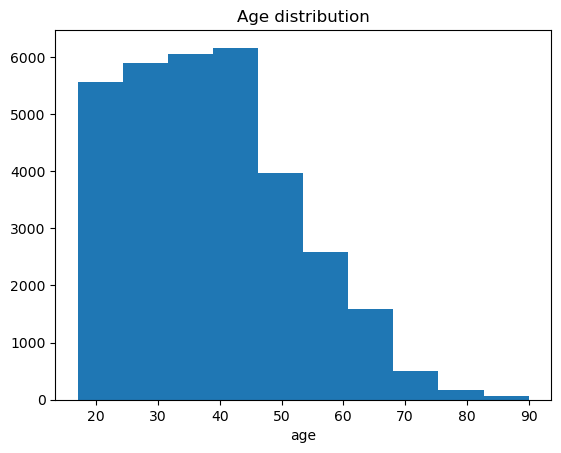

In [9]:
# checking the distribution of age

plt.hist(df['age'])
plt.xlabel('age')
plt.ylabel=('count')
plt.title('Age distribution')
plt.show()

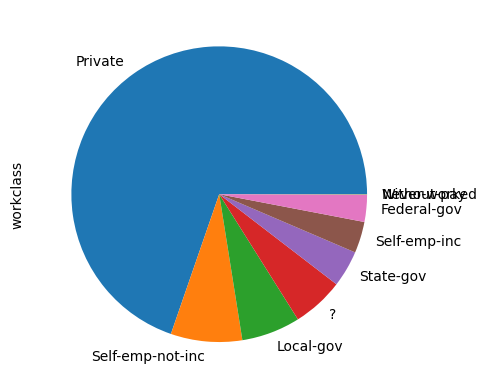

In [10]:
# ckeck working class


df['workclass'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']=(7,10)
plt.show()

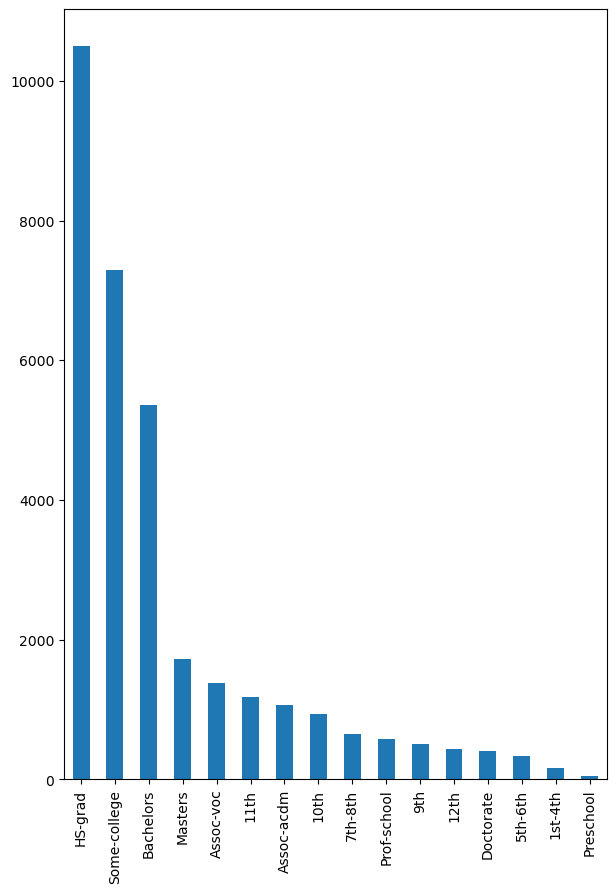

In [11]:
# checking education

df['education'].value_counts().plot(kind='bar')
plt.rcParams['figure.figsize']=(5,4)
plt.show()

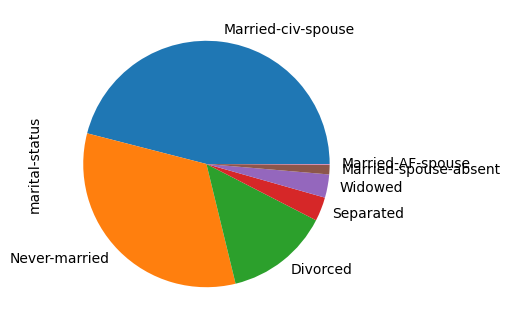

In [12]:
# check marital status

df['marital-status'].value_counts().plot(kind='pie')
plt.rcParams['figure.figsize']=(7,7)
plt.show()



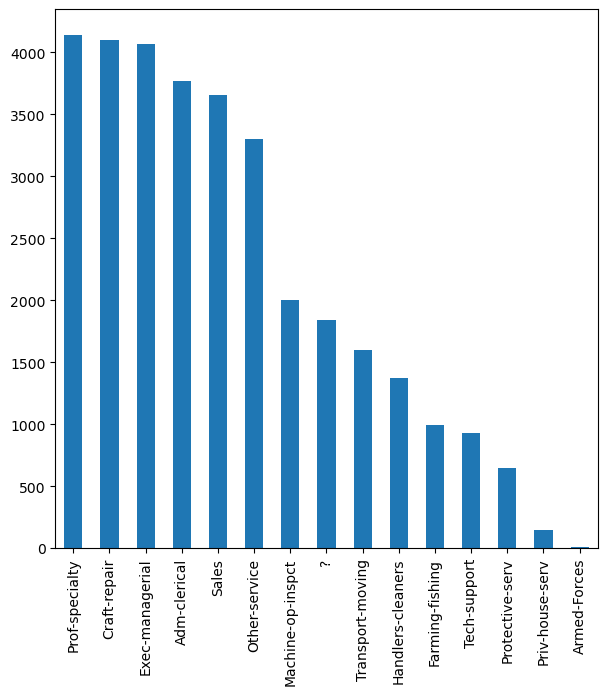

In [13]:
# checking occupation

df['occupation'].value_counts().plot(kind='bar')
plt.show()

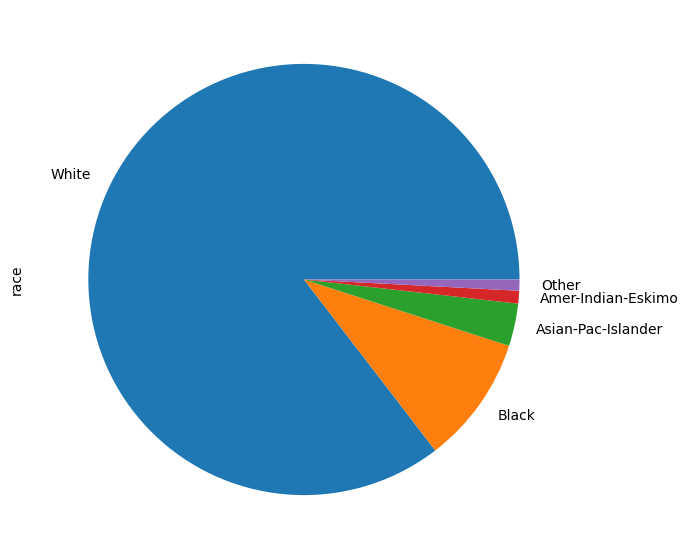

In [14]:
# checking ethinicity

df['race'].value_counts().plot(kind='pie')
plt.show()

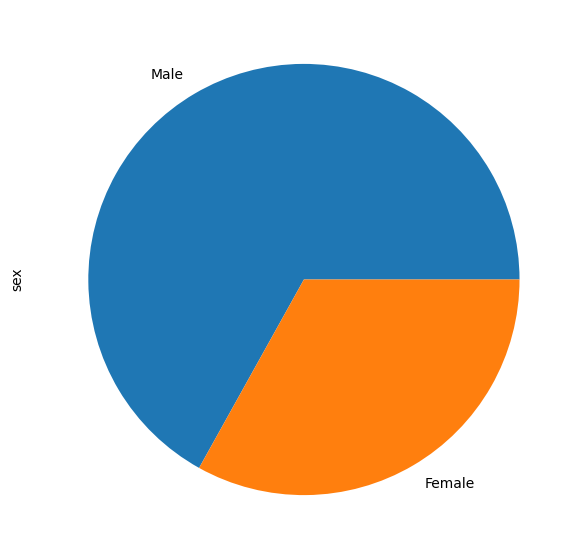

In [15]:
# checking gender

df['sex'].value_counts().plot(kind='pie')
plt.show()

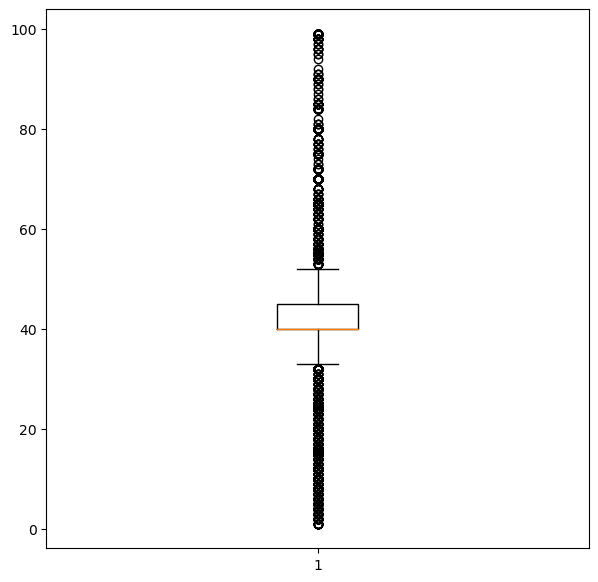

In [16]:
# checking working hours

plt.boxplot(df['hours-per-week'])
plt.show()

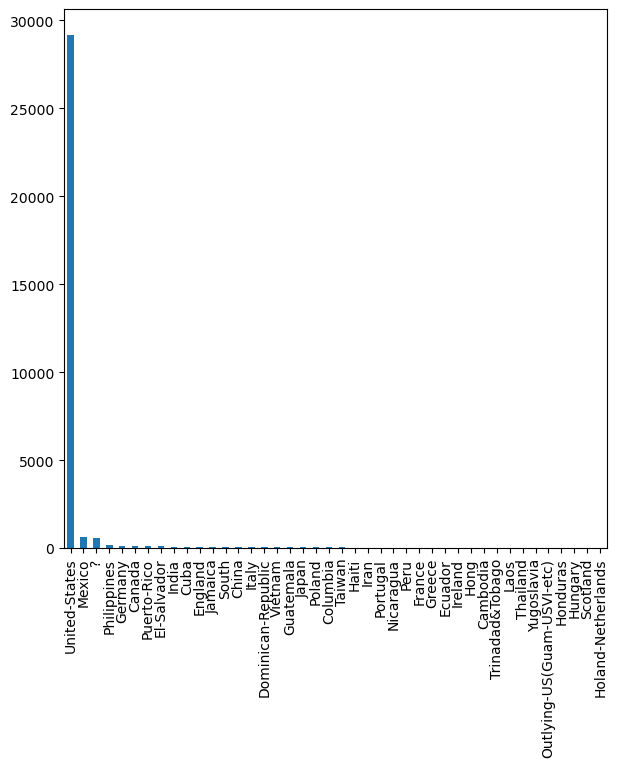

In [17]:
# checking country of origin

df['native-country'].value_counts().plot(kind='bar')
plt.show()

In [18]:
#Frequency Graph

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'capital-gain'}>,
        <AxesSubplot:title={'center':'capital-loss'}>],
       [<AxesSubplot:title={'center':'hours-per-week'}>, <AxesSubplot:>]],
      dtype=object)

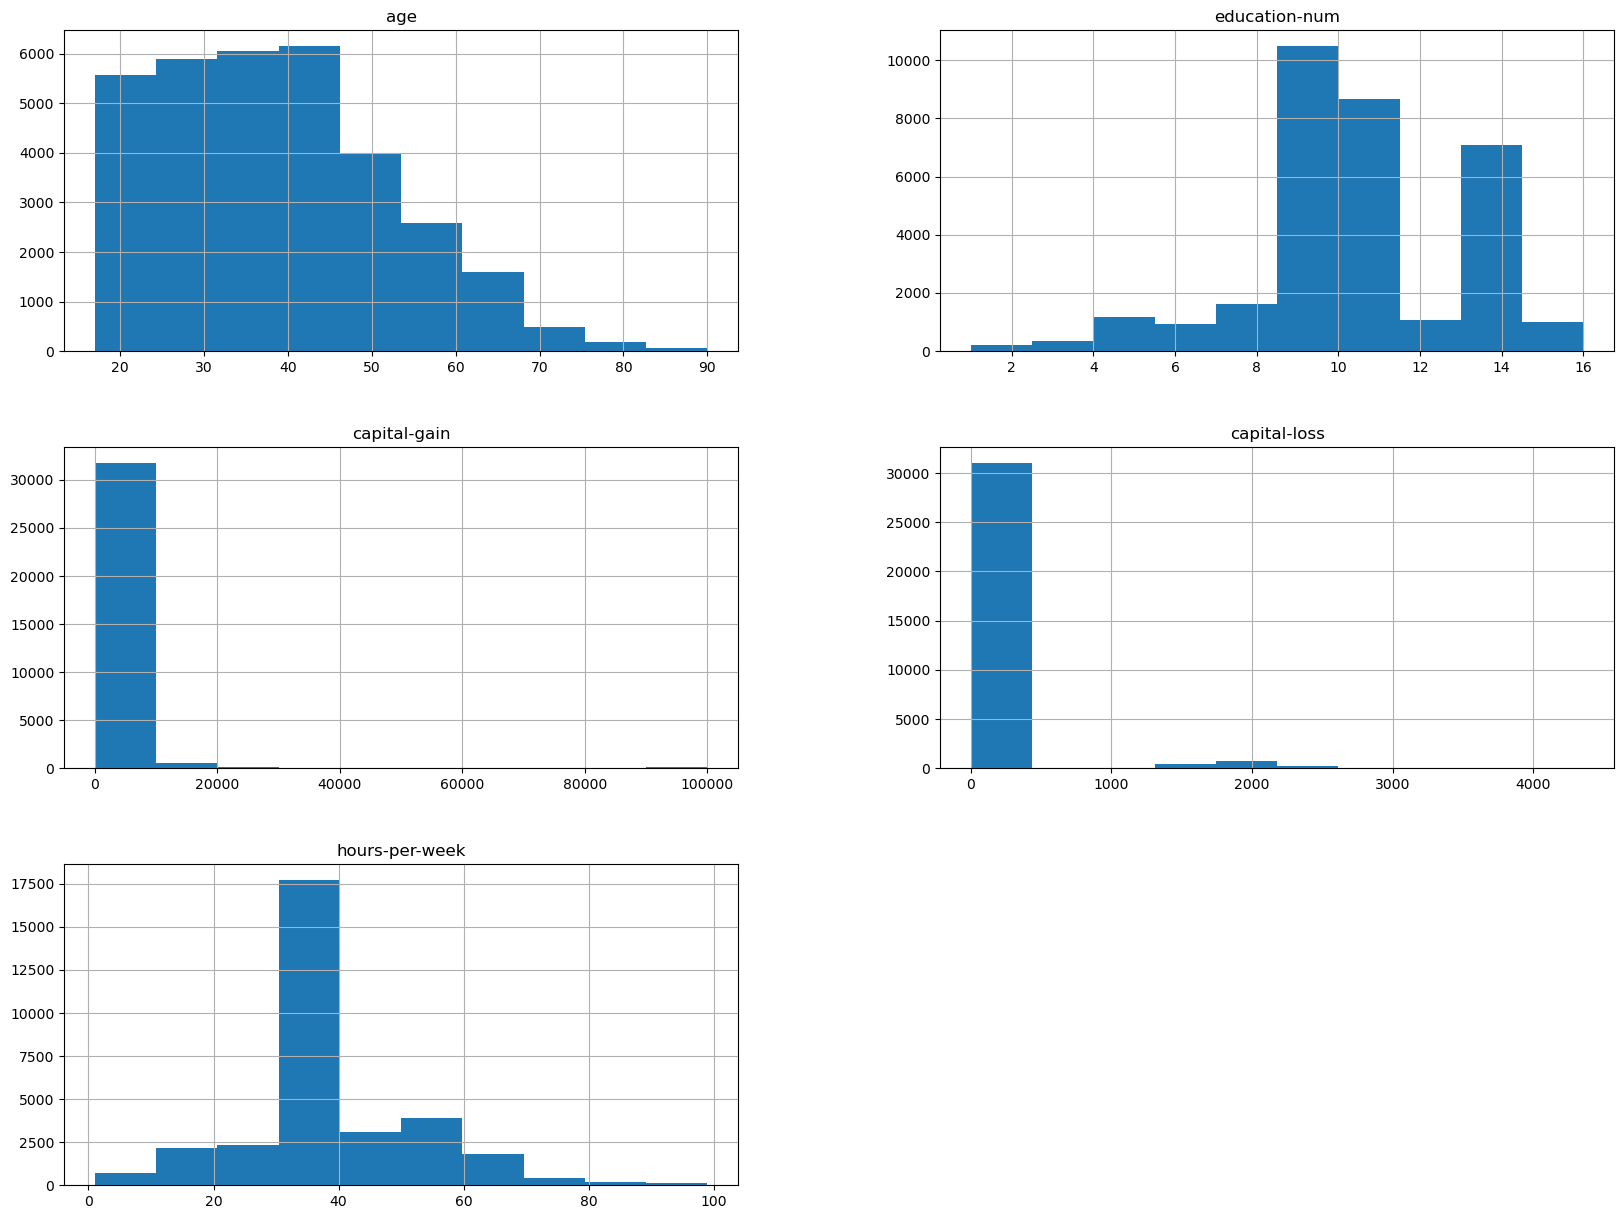

In [19]:
freq_graph = df.select_dtypes(include = ["float", "int"])
freq_graph.hist(figsize = (20, 15))

In [20]:
#Checking Skewness

In [21]:
numfeature = [features for features in df.columns if df[features].dtypes!="O" and features !='salary']
numfeature

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [22]:
for i in numfeature:
    skew_data = df[i].skew()
    print(skew_data)

0.5587433694130484
-0.3116758679102297
11.953847687699799
4.594629121679692
0.22764253680450092


C:\Users\E\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


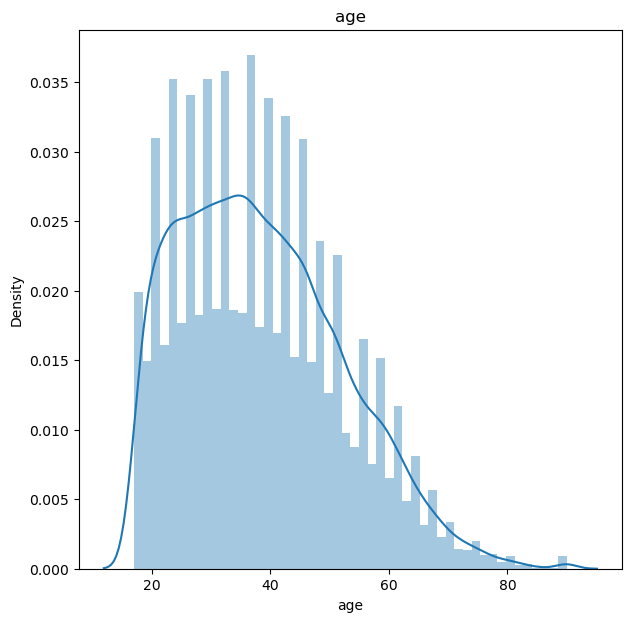

C:\Users\E\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


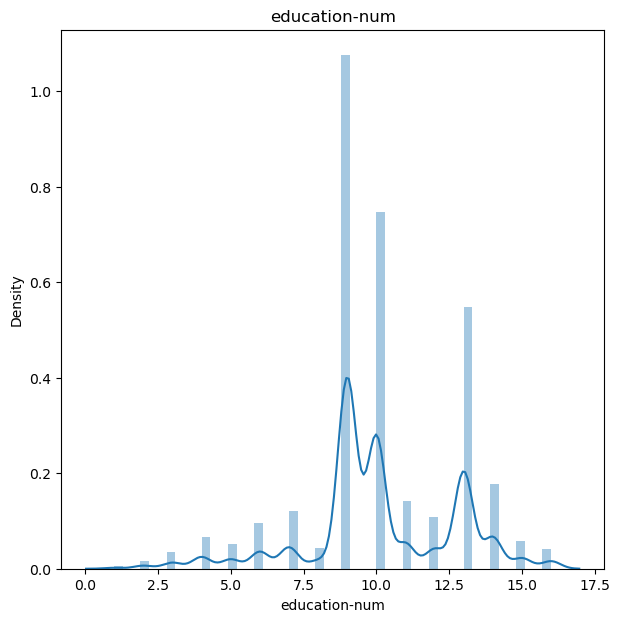

C:\Users\E\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


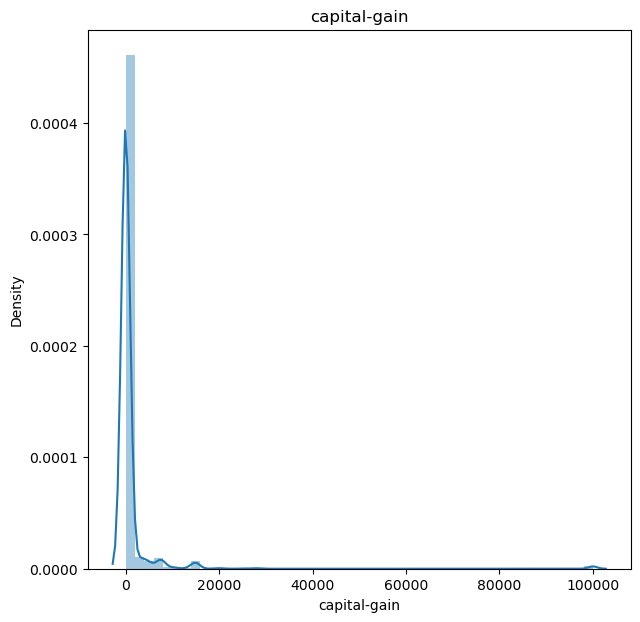

C:\Users\E\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


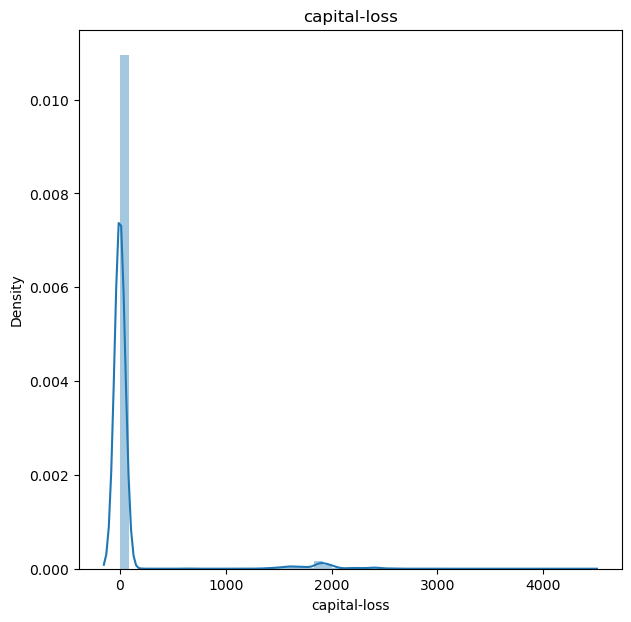

C:\Users\E\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


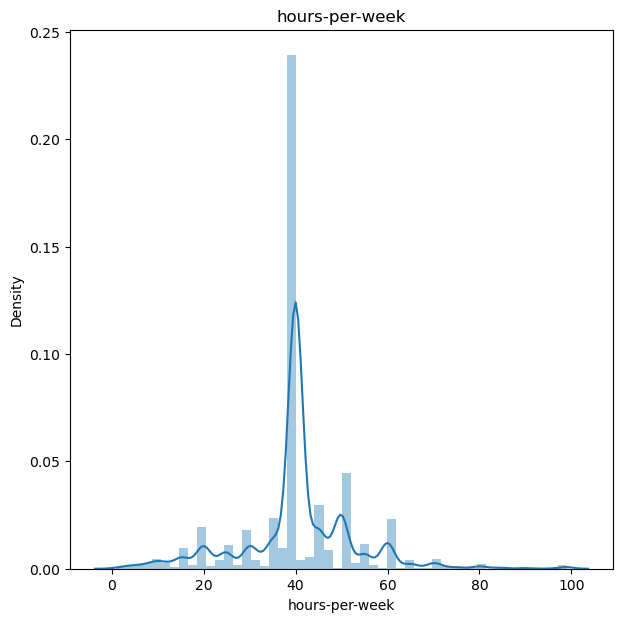

In [23]:
for i in numfeature:
    sns.distplot(df[i])
    plt.title(i)
    plt.show()

# Outlier Handling

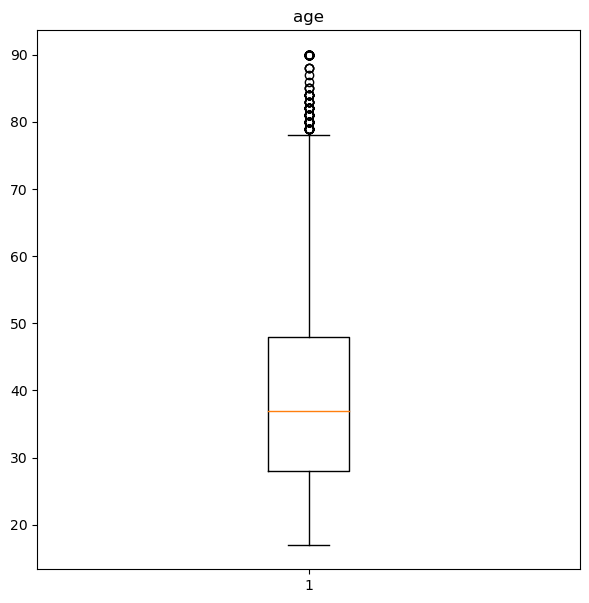

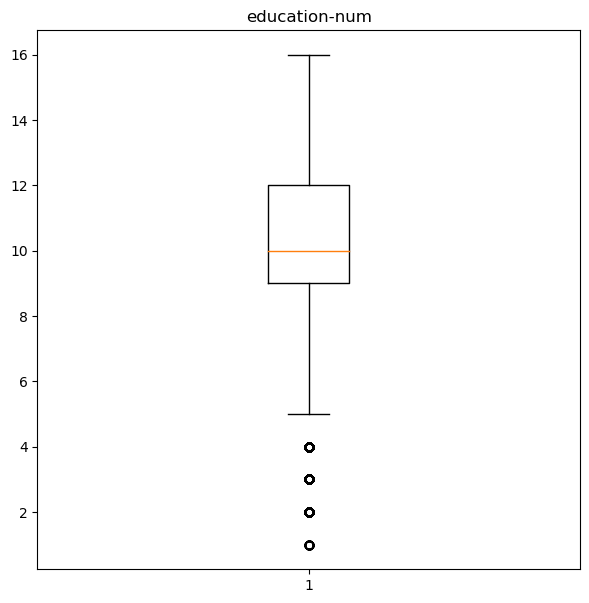

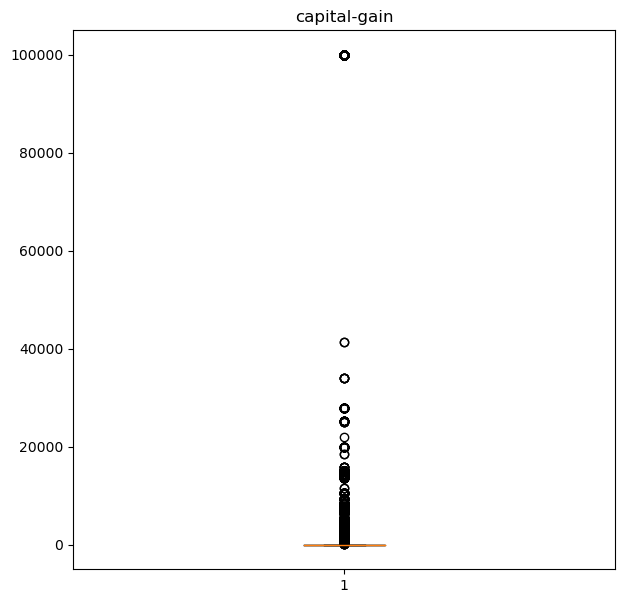

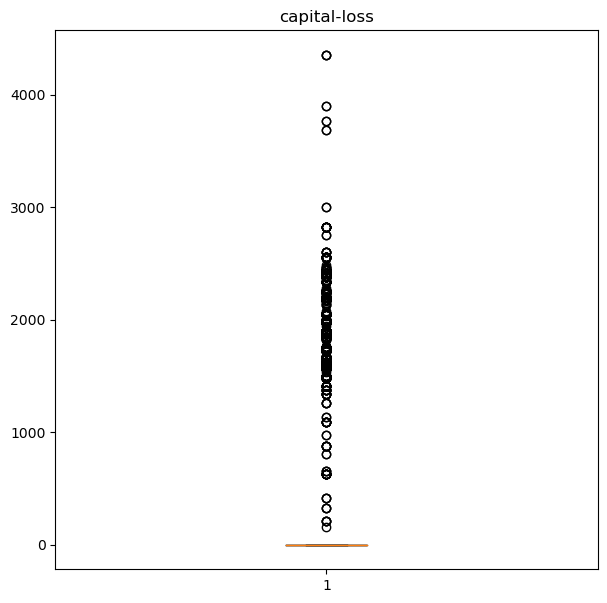

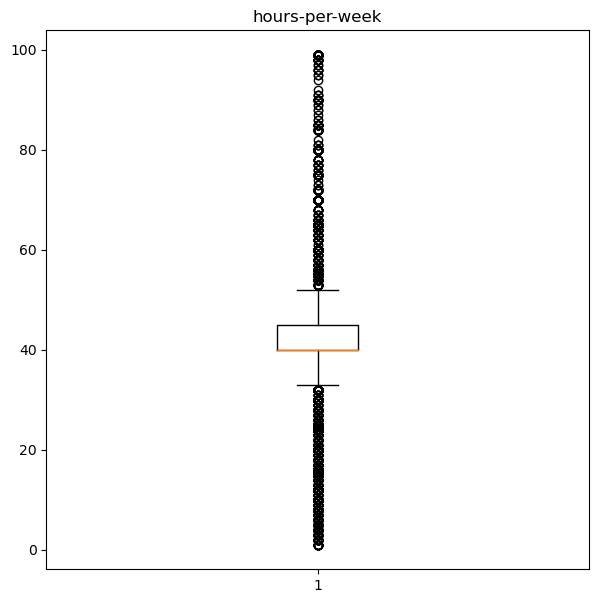

In [24]:
for i in numfeature:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [25]:
Q1 = np.percentile(df['age'], 25,interpolation='midpoint')
Q2 = np.percentile(df['age'], 50,interpolation='midpoint')
Q3 = np.percentile(df['age'], 75,interpolation='midpoint')
print('Q1 is',Q1)
print('Q2 is',Q2)
print('Q3 is',Q3)
IQR = Q3-Q1
print('IQR is',IQR)
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print('low_limit is',low_limit)
print('up_limit is', up_limit)

Q1 is 28.0
Q2 is 37.0
Q3 is 48.0
IQR is 20.0
low_limit is -2.0
up_limit is 78.0


In [26]:
df['age']= np.where(df['age']>up_limit,up_limit, df['age'])
print(df['age'])

0        39.0
1        50.0
2        38.0
3        53.0
4        28.0
         ... 
32556    27.0
32557    40.0
32558    58.0
32559    22.0
32560    52.0
Name: age, Length: 32561, dtype: float64


In [27]:
numfeature

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [28]:
Q1 = np.percentile(df['education-num'], 25,interpolation='midpoint')
Q2 = np.percentile(df['education-num'], 50,interpolation='midpoint')
Q3 = np.percentile(df['education-num'], 75,interpolation='midpoint')
print('Q1 is',Q1)
print('Q2 is',Q2)
print('Q3 is',Q3)
IQR = Q3-Q1
print('IQR is',IQR)
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print('low_limit is',low_limit)
print('up_limit is', up_limit)

Q1 is 9.0
Q2 is 10.0
Q3 is 12.0
IQR is 3.0
low_limit is 4.5
up_limit is 16.5


In [29]:
df['education-num']= np.where(df['education-num']<low_limit,low_limit, df['education-num'])
print(df['education-num'])

0        13.0
1        13.0
2         9.0
3         7.0
4        13.0
         ... 
32556    12.0
32557     9.0
32558     9.0
32559     9.0
32560     9.0
Name: education-num, Length: 32561, dtype: float64


In [31]:
def remove_outlier_capital_loss(df):
    
    IQR=df['capital-loss'].quantile(0.75)-df['capital-loss'].quantile(0.25)
    
    
    lower_range=df['capital-loss'].quantile(0.25)-(1.5*IQR)
    upper_range=df['capital-loss'].quantile(0.75)+(1.5*IQR)
    
    df.loc[df['capital-loss']<=lower_range,'capital-loss']=lower_range
    df.loc[df['capital-loss']>=upper_range,'capital-loss']=upper_range

In [32]:
# remove_outlier_hours_per_week(df):
Q1 = np.percentile(df['hours-per-week'], 25,interpolation='midpoint')
Q2 = np.percentile(df['hours-per-week'], 50,interpolation='midpoint')
Q3 = np.percentile(df['hours-per-week'], 75,interpolation='midpoint')
print('Q1 is',Q1)
print('Q2 is',Q2)
print('Q3 is',Q3)
IQR = Q3-Q1
print('IQR is',IQR)
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR
print('low_limit is',low_limit)
print('up_limit is', up_limit)

Q1 is 40.0
Q2 is 40.0
Q3 is 45.0
IQR is 5.0
low_limit is 32.5
up_limit is 52.5


In [33]:
 df['hours-per-week']= np.where(df['hours-per-week']<low_limit,low_limit, df['hours-per-week'])
print(df['hours-per-week'])
df['age']= np.where(df['hours-per-week']>up_limit,up_limit, df['hours-per-week'])
print(df['hours-per-week'])

0        40.0
1        32.5
2        40.0
3        40.0
4        40.0
         ... 
32556    38.0
32557    40.0
32558    40.0
32559    32.5
32560    40.0
Name: hours-per-week, Length: 32561, dtype: float64
0        40.0
1        32.5
2        40.0
3        40.0
4        40.0
         ... 
32556    38.0
32557    40.0
32558    40.0
32559    32.5
32560    40.0
Name: hours-per-week, Length: 32561, dtype: float64


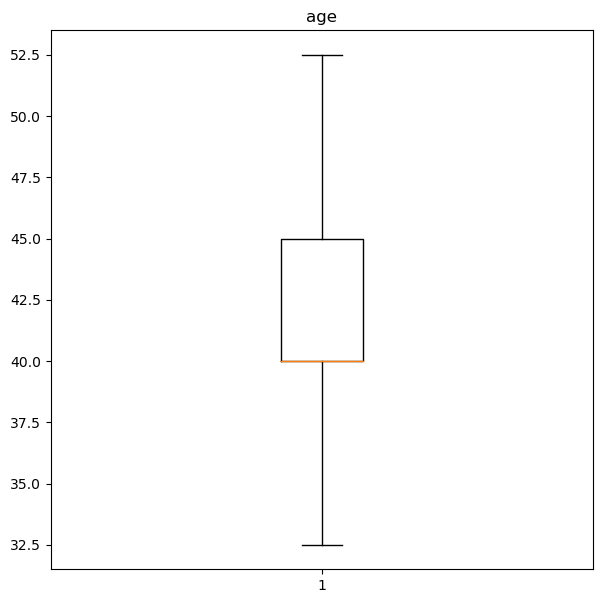

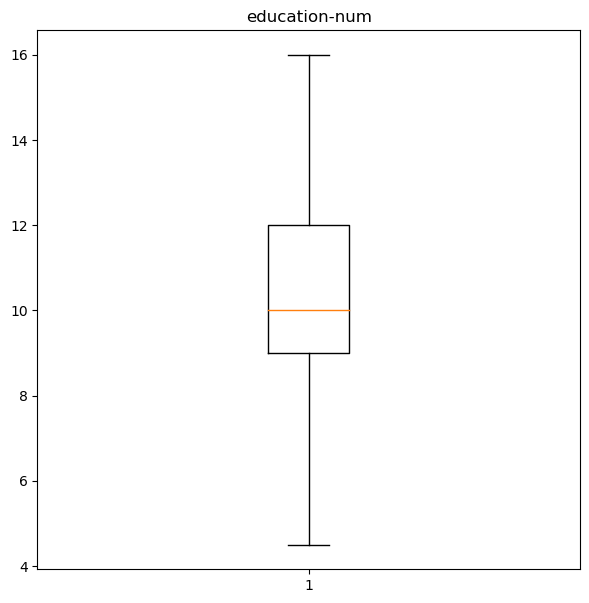

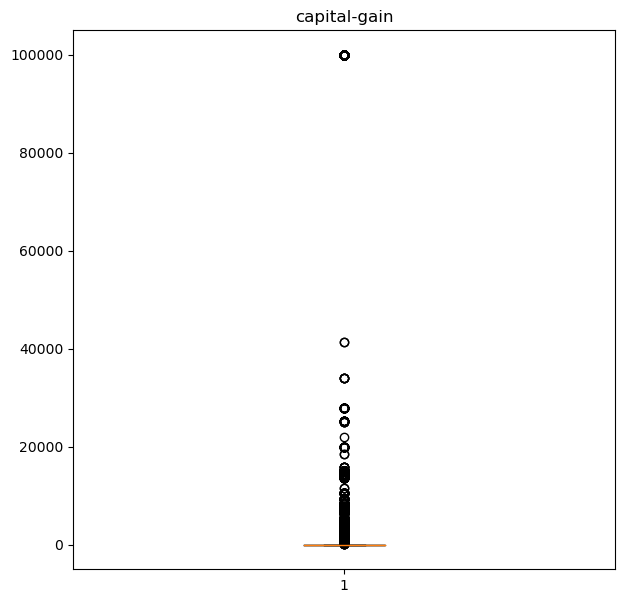

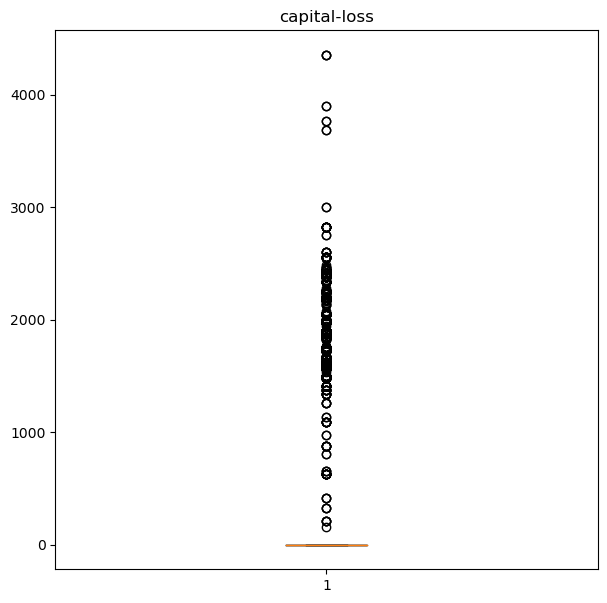

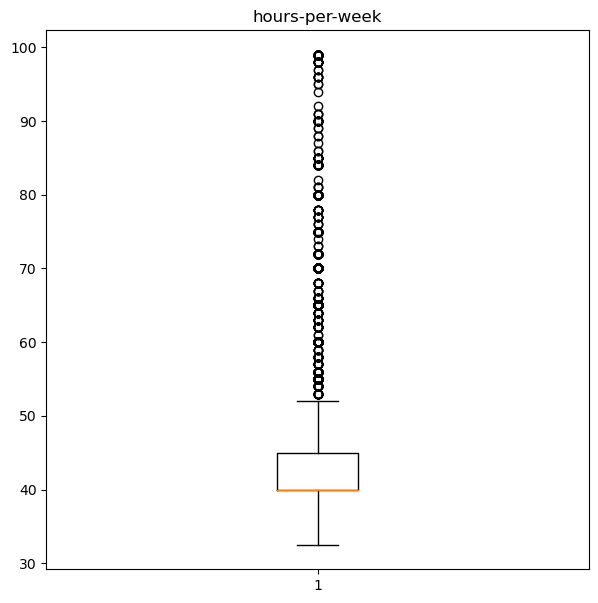

In [34]:
for i in numfeature:
    plt.boxplot(df[i])
    plt.title(i)
    plt.show()

In [35]:
df.dtypes

age               float64
workclass          object
education          object
education-num     float64
marital-status     object
occupation         object
relationship       object
race               object
sex                object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
salary             object
dtype: object

# LABEL ENCODING

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le=LabelEncoder()

In [38]:
for i in['workclass','education','marital-status','occupation','relationship','race','sex','native-country']:
    df[i] = le.fit_transform(df[i])

In [39]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,40.0,7,9,13.0,4,1,1,4,1,2174,0,40.0,39,<=50K
1,32.5,6,9,13.0,2,4,0,4,1,0,0,32.5,39,<=50K
2,40.0,4,11,9.0,0,6,1,4,1,0,0,40.0,39,<=50K
3,40.0,4,1,7.0,2,6,0,2,1,0,0,40.0,39,<=50K
4,40.0,4,9,13.0,2,10,5,2,0,0,0,40.0,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,38.0,4,7,12.0,2,13,5,4,0,0,0,38.0,39,<=50K
32557,40.0,4,11,9.0,2,7,0,4,1,0,0,40.0,39,>50K
32558,40.0,4,11,9.0,6,1,4,4,0,0,0,40.0,39,<=50K
32559,32.5,4,11,9.0,4,1,3,4,1,0,0,32.5,39,<=50K


# SCALING

In [40]:
df.describe()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,41.202451,3.868892,10.298210,10.124321,2.611836,6.572740,1.446362,3.665858,0.669205,1077.648844,87.303830,42.365929,36.718866
std,6.187005,1.455960,3.870264,2.459770,1.506222,4.228857,1.606771,0.848806,0.470506,7385.292085,402.960219,9.277059,7.823782
min,32.500000,0.000000,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.500000,0.000000
25%,40.000000,4.000000,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000
50%,40.000000,4.000000,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000
75%,45.000000,4.000000,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000
max,52.500000,8.000000,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000


In [41]:
X1=df.drop(['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary'],axis=1)

In [42]:
X1

,age,education-num,capital-gain,capital-loss,hours-per-week
0,40.0,13.0,2174,0,40.0
1,32.5,13.0,0,0,32.5
2,40.0,9.0,0,0,40.0
3,40.0,7.0,0,0,40.0
4,40.0,13.0,0,0,40.0
...,...,...,...,...,...
32556,38.0,12.0,0,0,38.0
32557,40.0,9.0,0,0,40.0
32558,40.0,9.0,0,0,40.0
32559,32.5,9.0,0,0,32.5


In [43]:
X1.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [44]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler(feature_range=(0,1)) 
X1=minmax.fit_transform(X1)

In [45]:
X1=pd.DataFrame(X1,columns=['age', 'education-num', 'capital-gain', 'capital-loss','hours-per-week'])

In [46]:
X1

,age,education-num,capital-gain,capital-loss,hours-per-week
0,0.375,0.739130,0.021740,0.0,0.112782
1,0.000,0.739130,0.000000,0.0,0.000000
2,0.375,0.391304,0.000000,0.0,0.112782
3,0.375,0.217391,0.000000,0.0,0.112782
4,0.375,0.739130,0.000000,0.0,0.112782
...,...,...,...,...,...
32556,0.275,0.652174,0.000000,0.0,0.082707
32557,0.375,0.391304,0.000000,0.0,0.112782
32558,0.375,0.391304,0.000000,0.0,0.112782
32559,0.000,0.391304,0.000000,0.0,0.000000


In [47]:
X2=df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']]

In [48]:
X2

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,7,9,4,1,1,4,1,39,<=50K
1,6,9,2,4,0,4,1,39,<=50K
2,4,11,0,6,1,4,1,39,<=50K
3,4,1,2,6,0,2,1,39,<=50K
4,4,9,2,10,5,2,0,5,<=50K
...,...,...,...,...,...,...,...,...,...
32556,4,7,2,13,5,4,0,39,<=50K
32557,4,11,2,7,0,4,1,39,>50K
32558,4,11,6,1,4,4,0,39,<=50K
32559,4,11,4,1,3,4,1,39,<=50K


In [49]:
df1=pd.concat([X1,X2], axis = 1)

In [50]:
df1


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,0.375,0.739130,0.021740,0.0,0.112782,7,9,4,1,1,4,1,39,<=50K
1,0.000,0.739130,0.000000,0.0,0.000000,6,9,2,4,0,4,1,39,<=50K
2,0.375,0.391304,0.000000,0.0,0.112782,4,11,0,6,1,4,1,39,<=50K
3,0.375,0.217391,0.000000,0.0,0.112782,4,1,2,6,0,2,1,39,<=50K
4,0.375,0.739130,0.000000,0.0,0.112782,4,9,2,10,5,2,0,5,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.275,0.652174,0.000000,0.0,0.082707,4,7,2,13,5,4,0,39,<=50K
32557,0.375,0.391304,0.000000,0.0,0.112782,4,11,2,7,0,4,1,39,>50K
32558,0.375,0.391304,0.000000,0.0,0.112782,4,11,6,1,4,4,0,39,<=50K
32559,0.000,0.391304,0.000000,0.0,0.000000,4,11,4,1,3,4,1,39,<=50K
